# Selecting the best model for predicting the selling price

### Importing the standard libraries

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [127]:
dataset = pd.read_csv('../assets/car-details-for-ml.csv')

dataset.head()

,year,km_driven,fuel,transmission,seller_type,owner,seats,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,selling_price
0,2014,145500,0,0,1,0,5.0,23.40,1248,74.00,...,0,0,0,0,0,0,0,0,0,450000
1,2014,120000,0,0,1,2,5.0,21.14,1498,103.52,...,0,0,0,0,1,0,0,0,0,370000
2,2006,140000,1,0,1,3,5.0,17.70,1497,78.00,...,0,0,0,0,0,0,0,0,0,158000
3,2010,127000,0,0,1,0,5.0,23.00,1396,90.00,...,0,0,0,0,0,0,0,0,0,225000
4,2007,120000,1,0,1,0,5.0,16.10,1298,88.20,...,0,0,0,0,0,0,0,0,0,130000


In [128]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting data to train and test sets

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=73)

### Defining methods for helping to evaluate the models

In [130]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R2 (R-squared) score = Statistical measure of how close the predicted data are to the actual data.
# Mean Absolute Error (MAE) = The mean value of all errors, positive and negative (absolute value)
# Root Mean Squared Error (RMSE) = The errors are squared and then the mean value is found. The root of the calculated mean value is taken.

labels = ['Model', 'R2', 'MAE', 'RMSE']
results = []

def model_evaluation(model: str, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    results.append([model, r2, mae, rmse])
    return [model, r2, mae, rmse]

In [131]:
# Plots n predictions and actual values against each other
import random

def plot_results_graph(model: str, y_test, y_pred, start: int = 0, end: int = 200):
    color = (random.random(), random.random(), 0)

    plt.figure(figsize=(20, 8))
    plt.plot(y_test[start:end], color="b")
    plt.plot(y_pred[start:end], '--', color=color,)
    plt.title(model)
    plt.ylabel('Price')
    plt.legend(['Actual value','Predicted value'])
    plt.show()

## Linear Regression

We will start out by testing the Linear Regression model, as a lot of the features seemed to have a linear relation with one another.

In [132]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**Predicting the selling price from the test set**

In [133]:
y_pred = lin_reg.predict(X_test)

np.set_printoptions(precision=2)
pred_vs_actual = np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1)

print(["Actual", "Predictions"])
print(pred_vs_actual[:8])

['Actual', 'Predictions']
[[3400000.   3167029.57]
 [ 950000.    897326.57]
 [ 934000.    662089.09]
 [ 450000.    377910.69]
 [ 350000.    506326.19]
 [ 140000.    160681.77]
 [1125000.    952061.4 ]
 [ 316000.    409682.88]]


Some of the results are not very good and some are pretty close. I don't think this model is the best, so let's evaluate it and see if we can find a better fit.

### Evaluating the model

In [134]:
lin_reg_result = model_evaluation('Linear Regression', y_test, y_pred)

for i in range(len(lin_reg_result)):
    print(labels[i], ':', lin_reg_result[i])

Model : Linear Regression
R2 : 0.8488188683573407
MAE : 138948.16612886183
RMSE : 230871.72159128037


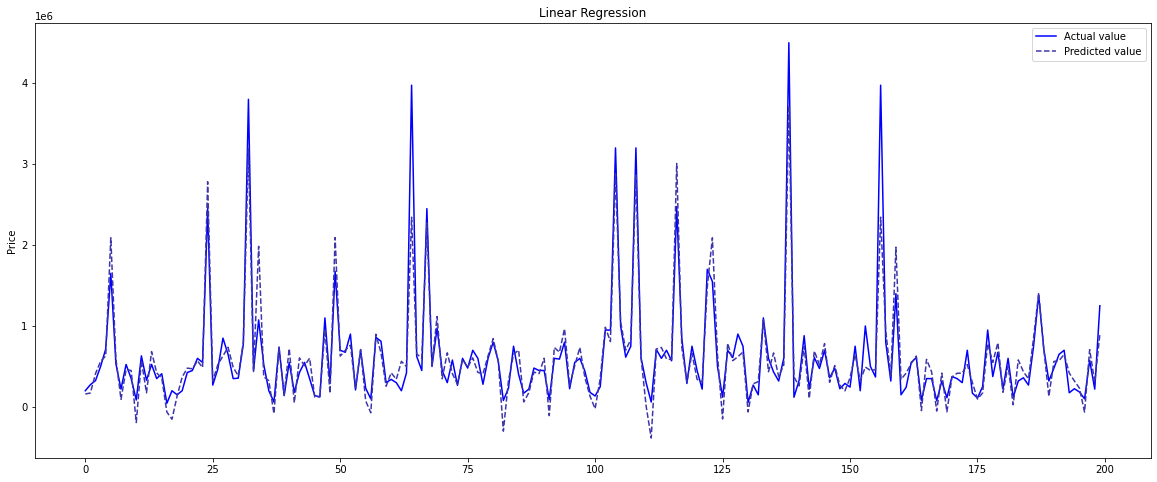

In [135]:
plot_results_graph('Linear Regression', y_test, y_pred, 200, 400)

Looking at the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) we can see that the model is not very good. The predictions are off by a high value, which is not good. The R2 score is also not the greatest, but it is still a decent model. By looking at the lines of the graph we can see the model is doing alright at predicting the lower end of the price range, but can be caught off by the higher end.

## Support Vector Regression

Not happy with the result of the Linear Regression model, we will try the Support Vector Regression model and see if we can improve the results.

The SVR model requires the features to be scaled down to a value between -3 and 3. To do this I will use the StandardScaler from the sklearn library.

In [136]:
from sklearn.preprocessing import StandardScaler

X_std_scaler = StandardScaler()

X_train_scaled = X_std_scaler.fit_transform(X_train)
X_test_scaled = X_std_scaler.fit_transform(X_test)

In [137]:
print(X_train_scaled[0])
print(X_test_scaled[0])


[-0.25 -0.23  1.09 -0.37  2.86 -0.69 -0.45  0.59 -0.9  -0.7  -0.98  0.
 -0.01 -0.07 -0.08 -0.17 -0.02 -0.09 -0.07 -0.03 -0.23 -0.26 -0.46 -0.03
 -0.09 -0.06 -0.03 -0.02 -0.02 -0.33  1.53 -0.08 -0.04 -0.1  -0.01 -0.18
 -0.11 -0.32 -0.25 -0.15 -0.09]
[ 1.07 -1.05 -0.88  2.8  -2.21 -0.72 -0.44 -0.35  1.03  2.99  2.54 -0.05
  0.   -0.08 -0.08 -0.18  0.   -0.1  -0.07  0.   -0.24 -0.24 -0.45 -0.03
 -0.11 -0.08  0.   -0.04  0.   -0.33 -0.66 -0.08 -0.05 -0.12  0.   -0.17
 -0.13 -0.31 -0.24 -0.17 10.42]


Perfect. The features are now scaled down to a value the SVR requires.

In [138]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="rbf", C=1000000)
svm_reg.fit(X_train_scaled, y_train)

SVR(C=1000000)

The SVR model seems to perform best with a kernel of rbf and a C of a higher value.

In [139]:
y_pred = svm_reg.predict(X_test_scaled)

np.set_printoptions(precision=2)
pred_vs_actual = np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1)

print(["Actual", "Predictions"])
print(pred_vs_actual[:8])

['Actual', 'Predictions']
[[3400000.   2920509.13]
 [ 950000.   1089180.43]
 [ 934000.    668079.85]
 [ 450000.    427211.84]
 [ 350000.    437788.45]
 [ 140000.    213820.4 ]
 [1125000.   1115732.28]
 [ 316000.    285293.75]]


In [140]:
svm_reg_result = model_evaluation('Support Vector Regression', y_test, y_pred)

for i in range(len(svm_reg_result)):
    print(labels[i], ':', svm_reg_result[i])

Model : Support Vector Regression
R2 : 0.8810850113368337
MAE : 84492.96693974992
RMSE : 204757.70111118388


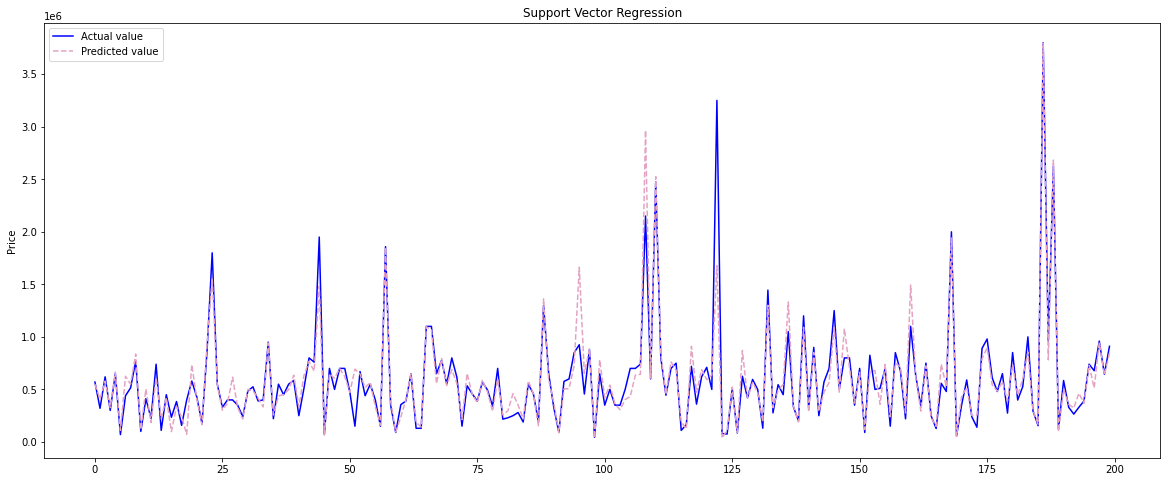

In [141]:
plot_results_graph('Support Vector Regression', y_test, y_pred, 400, 600)

The results yielded from the SVR model are better than the Linear Regression model, but not by a lot. The R2 score is still not great, but the MAE and RMSE have improved a bit.

## Decision Tree Regression

Again not happy with the results of the SVR model, I will try the Decision Tree model and see if I can improve the results.

In [142]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=73)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=73)

In [143]:
y_pred = tree_reg.predict(X_test)

np.set_printoptions(precision=2)
pred_vs_actual = np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1)

print(["Actual", "Predictions"])
print(pred_vs_actual[:8])

['Actual', 'Predictions']
[[3400000. 3400000.]
 [ 950000. 1200000.]
 [ 934000.  600000.]
 [ 450000.  450000.]
 [ 350000.  380000.]
 [ 140000.  110000.]
 [1125000. 1125000.]
 [ 316000.  268000.]]


In [144]:
tree_reg_result = model_evaluation('Linear Regression', y_test, y_pred)

for i in range(len(svm_reg_result)):
    print(labels[i], ':', tree_reg_result[i])

Model : Linear Regression
R2 : 0.9301379178687305
MAE : 75706.39759110946
RMSE : 156943.2739296638


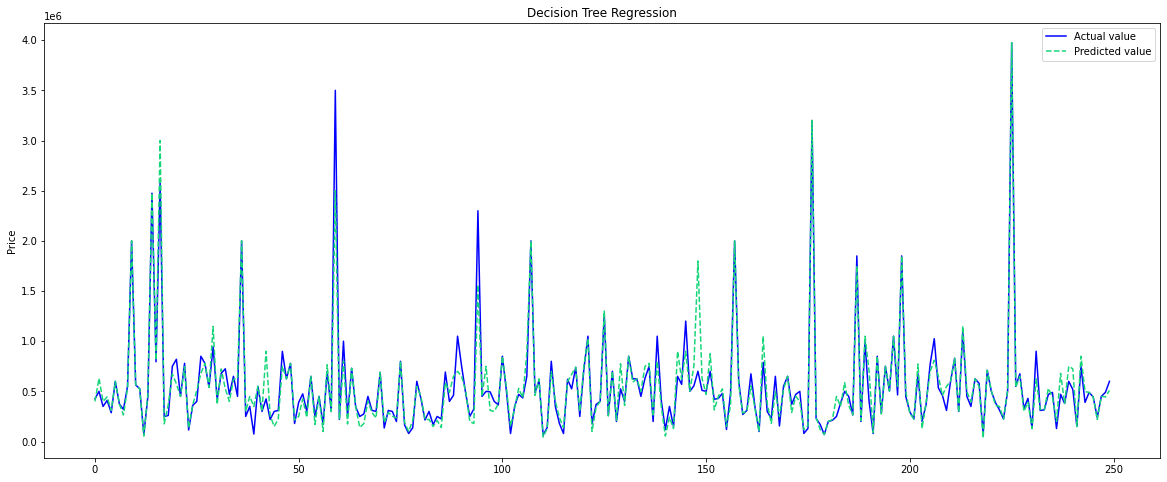

In [145]:
plot_results_graph('Decision Tree Regression', y_test, y_pred, 1000, 1250)

The decision tree regression model has yielded the best results so far. But I'm sure we can get even closer. The R2, MAE and RMSE scores have all improved a bit. The graph still shows a decent fit, but there are still some outliers.